# Simulación de una pandemia viral utilizado el modelo SIR.

El modelo SIR es un modelo donde podremos utilizar las ecuaciones diferenciales como un proceso de modelado. En este caso, manejamos las tres siguientes variables:

\begin{array}{cc}
S=S(t) & \quad\textbf{El numero de individuos susceptibles.} \\
I=I(t) & \quad\textbf{El numero de individuos infectados.} \\
R=R(t) & \quad\textbf{El numero de individuos recuperados.} \\
\end{array}

Donde $t$ es el tiempo transcurrido en dias. Por lo tanto, las ecuaciones diferenciales a utilizar son:

\begin{equation}
\begin{array}{c}
\frac{dS}{dt}=-\frac{\beta IS}{N} \\
\frac{dI}{dt}=\frac{\beta IS}{N}-\gamma I \\
\frac{dR}{dt}=\gamma I
\end{array}
\end{equation}

Donde $\beta$ es el numero de contactos interpersonales, $N$ es el numero de población total y $\gamma$ es la tasa de recuperación por dias. Entonces, podemos demostrar un ejemplo sencillo de como funciona este modelo.

In [42]:
%matplotlib nbagg
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jtplot.style(ticks=True, figsize=(15, 12))

Escogemos unas variables iniciales para nuestro sistema.

In [26]:
N=1000     #El número de población total.
I0=1       #El número de personas infectadas inicialmente.
R0=0       #El número de personas recuperadas al comienzo.
S0=N-I0-R0 #El número de personas susceptibles a infectarse al comienzo.
b=0.2      #beta, es decir, el numero de contactos interpersonales.
g=1/10     #gamma, es decir, el numero de recuperacion por dias.
t=np.linspace(0,160,160) #Escogemos un lapso de dias de aproximadamente medio año.

Ahora, generamos una función que pueda resolver nuestras ecuaciones diferenciales. Para esto, utilizamos una función que nos brinda Scipy (es simplemente para no llenar de código, si no podriamos utilizar Runge-Kutta para su solución). Para utilizar esta función, primero le daremos valores iniciales a nuestras derivadas.

In [27]:
def derivadas(y,t,N,b,g):
    S,I,R=y
    dS=-b*S*I/N
    dI=b*S*I/N-g*I
    dR=g*I
    return dS,dI,dR

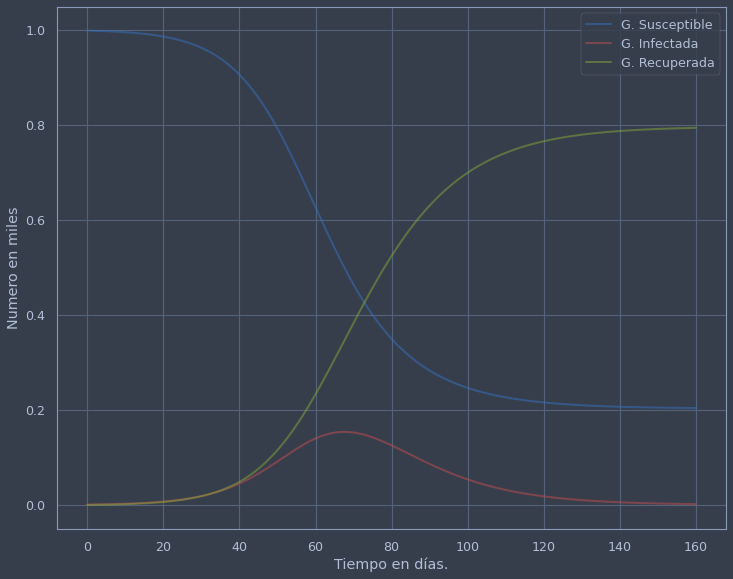

In [28]:
y0=S0,I0,R0
inte=odeint(derivadas,y0,t,args=(N,b,g))
S,I,R=inte.T

def graf(S,I,R,N):
    fig=plt.figure()
    plt.plot(t,S/N,'b',alpha=0.5,lw=2,label='G. Susceptible')
    plt.plot(t,I/N,'r',alpha=0.5,lw=2,label='G. Infectada')
    plt.plot(t,R/N,'g',alpha=0.5,lw=2,label='G. Recuperada')
    plt.xlabel('Tiempo en días.')
    plt.ylabel('Numero en miles')
    plt.legend()
    plt.grid(True)
    plt.show()
grafica=graf(S,I,R,N)